<h1 style="text-align: center">Gradient Descent algorithm</h1>
<p style="text-align: center"><strong>Linear Regression</strong> can be enhanced with the use of the <strong>Gradient Descent</strong> algorithm.</p>
<p style="text-align: center">By applying the <strong>Gradient Descent</strong> algorithm, we can optimize the <strong>theta</strong> parameters of our <strong>Linear Regression</strong> algorithm to improve its performance.</p>
<p style="text-align: center">This involves iteratively minimizing our cost function using small steps until we reach the optimal parameters.</p>
<img src="../../assets/GD/example.png" style="display: block; margin-left: auto; margin-right: auto">

<p style="text-align: center">To find the optimal parameters, we need to find the <strong>gradient</strong> (derivatives) of our cost function.</p>

$$ J:= \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 -> Cost\; Function$$
$$ h_{\theta}(x^{(i)}) = \theta_0 + \theta_1 x^{(i)} -> Linear\; Regression$$
$$ \frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) -> First\; Derivative$$
$$ \frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)} -> Second\; Derivative$$

<p style="text-align: center">We can then use these derivatives to update our parameters:</p>

$$ \theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0} -> Update\; \theta_0$$
$$ \theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1} -> Update\; \theta_1$$
$$ \alpha -> Learning\; Rate$$

<p style="text-align: center">We can then repeat this process until we reach the optimal parameters.</p>
<p style="text-align: center">The <strong>Gradient Descent</strong> algorithm is a very powerful optimization algorithm that can be used to optimize many different machine learning algorithms.</p>

## Implementation

In [59]:
import numpy as np

class GradientDescent:
    def __init__(self, learning_rate = 0.1, epochs = 1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias
            diff = (y_predicted - y)
            
            dw = np.dot(X.T, diff) / num_samples
            db = np.sum(diff) / num_samples

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def evaluate(self, X, y):
        return np.sum((self.predict(X) - y)**2)/len(y)
    
    def print(self):
        print(f'Weights : {self.weights}')
        print(f'Bias : {self.bias}')

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dataset of 30 employees with their years of experience and salary
df = pd.DataFrame({'YearsExperience': [1.1, 1.3, 1.5, 2, 2.2, 2.9, 3, 3.2, 3.2, 3.7, 3.9, 4, 4, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6, 6.8, 7.1, 7.9, 8.2, 8.7, 9, 9.5, 9.6, 10.3, 10.5], 'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]})

X = df['YearsExperience'].values
y = df['Salary'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

y_pred = None

diff_epochs = [1, 10, 100, 1000, 10000]

for i, epochs in enumerate(diff_epochs):
    model = GradientDescent(learning_rate=0.01, epochs=epochs)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'Epochs : {epochs}')
    model.print()
    print(f'Loss : {model.evaluate(X_test, y_test)}')
    print('------------------------------------')

Epochs : 1
Weights : [4358.70820833]
Bias : 738.8620833333333
Loss : 3495772374.8947663
------------------------------------
Epochs : 10
Weights : [12892.71910419]
Bias : 2540.61187052824
Loss : 103733922.6115523
------------------------------------
Epochs : 100
Weights : [12496.57788023]
Bias : 6601.90858241139
Loss : 81255794.37418304
------------------------------------
Epochs : 1000
Weights : [9829.36837221]
Bias : 23504.991244342826
Loss : 8852482.507512279
------------------------------------
Epochs : 10000
Weights : [9312.57513329]
Bias : 26780.09910906973
Loss : 12823412.210667096
------------------------------------


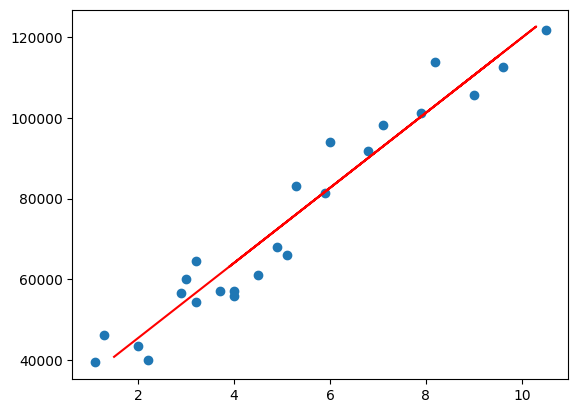

In [62]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color="red")
plt.show()